In [72]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [75]:
## read doc
df = pd.read_csv('./archive/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [76]:
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


Text(0, 0.5, 'Number')

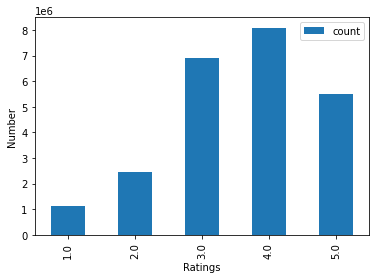

In [77]:
## change data type
p = df.groupby('Rating')['Rating'].agg(['count'])
p.plot.bar()
plt.xlabel('Ratings')
plt.ylabel('Number')


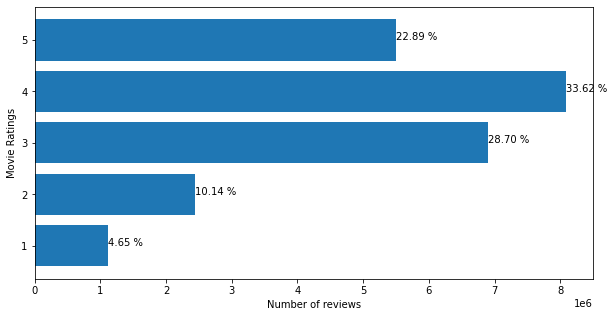

In [116]:
plt.figure(figsize = (10, 5))
plt.barh(range(1, 6), p['count'])
plt.ylabel('Movie Ratings')
plt.xlabel('Number of reviews')
for index, value in enumerate(p['count']):
    plt.text(value, 1 + index, '{:.2f} %'.format(100 * value/sum(p['count'])))
plt.savefig('vis.png')
plt.show()


In [78]:
## Find the index of movie id
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()
print(df_nan.shape)
df_nan.head()


movie_np = []
movie_id = 1

for i,j in tqdm(zip(df_nan['index'][1:],df_nan['index'][:-1])):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1



(4499, 2)


In [79]:
# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [81]:
# remove those Movie ID rows
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.head())

-Dataset examples-
   Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1


In [82]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::5000000, :])

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0
Original Shape: (24053764, 3)
After Trim Shape: (17337458, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
696        712664     5.0         3
6932490   1299309     5.0      1384
13860273   400155     3.0      2660
20766530   466962     4.0      3923


In [83]:
print(df.head())

     Cust_Id  Rating  Movie_Id
696   712664     5.0         3
697  1331154     4.0         3
698  2632461     3.0         3
699    44937     5.0         3
700   656399     4.0         3


In [84]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [85]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_p.to_csv('matrix.csv', sep = ',')

In [87]:
def cosine(a, b):
    return np.dot(a, b) /(np.linalg.norm(a) * np.linalg.norm(b))

In [88]:
print(cosine(df_p.iloc[0, :], df_p.iloc[1, :]))

nan


In [105]:
df_p.sample(5)

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
1226073,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
57717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108161,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN
1924568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
